In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the Dataset

In [2]:
df= pd.read_csv("Electric_Production.csv")

In [3]:
df.head()

,DATE,Prod
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df.DATE.dtype

dtype('O')

In [5]:
df=pd.read_csv("Electric_Production.csv", parse_dates= True, index_col='DATE')

In [6]:
df.head()

,Prod
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# plot time series to understand the behaviour of the data

In [7]:
from pylab import rcParams
rcParams['figure.figsize']= 15,8

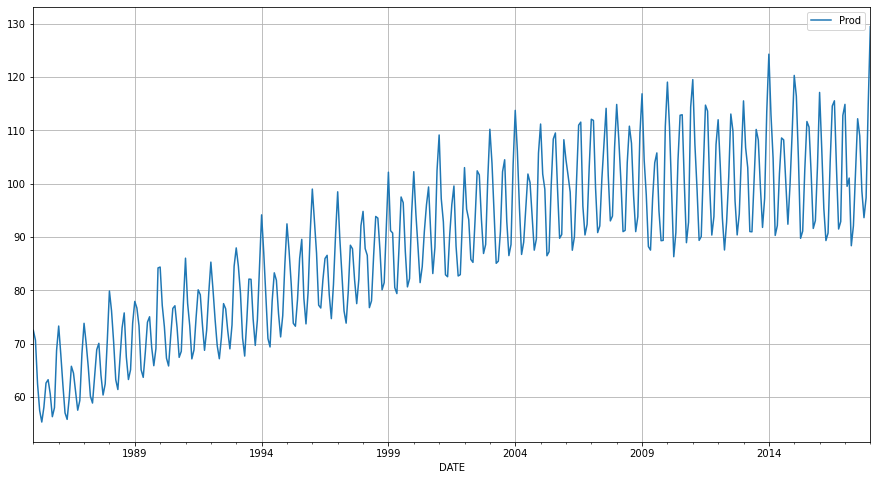

In [8]:
df.plot(grid=True);

### split the data into train and test and plot the training & test data.[30% of the most recent data should be in the test set]

In [9]:
len(df)

397

In [10]:
0.7*len(df)

277.9

In [11]:
df[0:int(277.9)]

,Prod
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2007-09-01,101.5316
2007-10-01,93.0068
2007-11-01,93.9126


In [12]:
df[277:]

,Prod
DATE,
2008-02-01,108.2353
2008-03-01,100.4386
2008-04-01,90.9944
2008-05-01,91.2348
2008-06-01,103.9581
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [13]:
train = df[0:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [14]:
print(train.shape)
print(test.shape)

(277, 1)
(120, 1)


because of test data is 120 rows so we can not forcast more than 120 months

In [15]:
from IPython.display import display

print('first few rows of training data')
print(train.head())
display(train.head())
print('last few rows of training data')
display(train.tail())

print('first few rows of test data')
display(test.head())
print('last few rows of test data')
display(test.tail())

first few rows of training data
               Prod
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


,Prod
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


last few rows of training data


,Prod
DATE,
2007-09-01,101.5316
2007-10-01,93.0068
2007-11-01,93.9126
2007-12-01,106.7528
2008-01-01,114.8331


first few rows of test data


,Prod
DATE,
2008-02-01,108.2353
2008-03-01,100.4386
2008-04-01,90.9944
2008-05-01,91.2348
2008-06-01,103.9581


last few rows of test data


,Prod
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


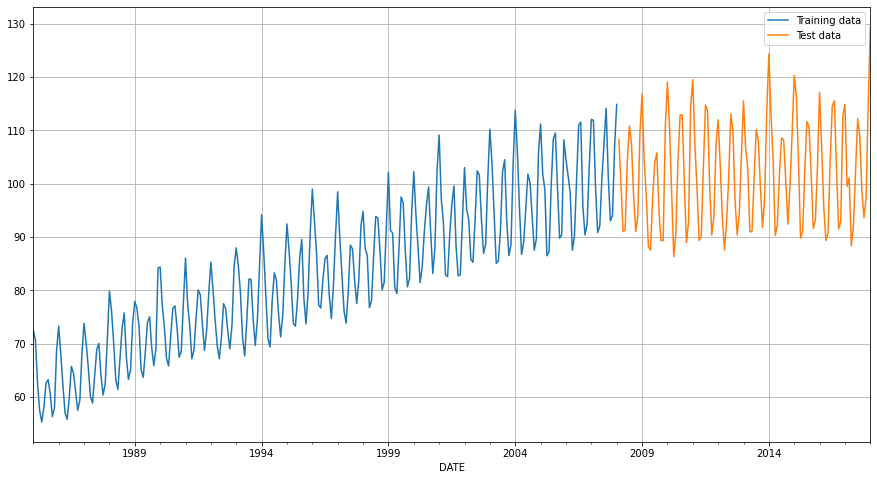

In [18]:
train['Prod'].plot()
test['Prod'].plot()
plt.grid()
plt.legend(['Training data','Test data'])
plt.show()

# Building different models & comparing the accuracy metrics

## model 1 : Linear Regression

For this perticular linear regression we are going to regress the 'births' variable against the order of the occurance. for this we need to modify our training data before fitting it into a linear regression.

In [19]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+278 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

we see that we have successfully generated the numerical time instance order for both training and test set. now we will add these values in the training and test set.

In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [36]:
LinearRegression_test.head()

,Prod,time
DATE,,
2008-02-01,108.2353,278
2008-03-01,100.4386,279
2008-04-01,90.9944,280
2008-05-01,91.2348,281
2008-06-01,103.9581,282


In [37]:
LinearRegression_train.head()

,Prod,time
DATE,,
1985-01-01,72.5052,1
1985-02-01,70.6720,2
1985-03-01,62.4502,3
1985-04-01,57.4714,4
1985-05-01,55.3151,5


1st step for linear regression model is import model

In [38]:
from sklearn.linear_model import LinearRegression

2nd step define the model

In [39]:
lr = LinearRegression()

3rd step fit the model on training data

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Prod'])


LinearRegression()

4th step predict the model

In [41]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])# regression prediction on training data
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])# regression prediction on test data
LinearRegression_test['RegOnTime'] = test_predictions_model1


In [42]:
LinearRegression_train.head()

,Prod,time,RegOnTime
DATE,,,
1985-01-01,72.5052,1,62.567884
1985-02-01,70.6720,2,62.716890
1985-03-01,62.4502,3,62.865896
1985-04-01,57.4714,4,63.014902
1985-05-01,55.3151,5,63.163909


In [43]:
LinearRegression_test.head()

,Prod,time,RegOnTime
DATE,,,
2008-02-01,108.2353,278,103.842589
2008-03-01,100.4386,279,103.991595
2008-04-01,90.9944,280,104.140601
2008-05-01,91.2348,281,104.289607
2008-06-01,103.9581,282,104.438613


in this we get actual values and predicted values

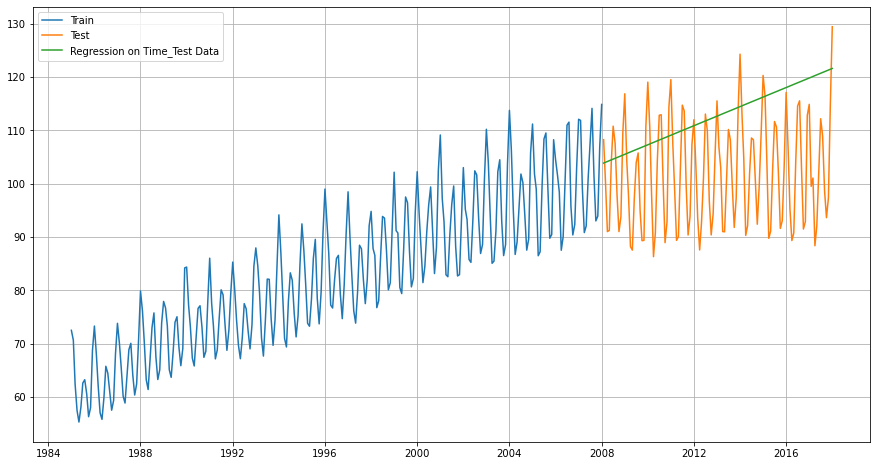

In [44]:
plt.plot(train['Prod'], label = 'Train')
plt.plot(test['Prod'], label= 'Test')
plt.plot(LinearRegression_test['RegOnTime'], label= 'Regression on Time_Test Data')
plt.legend(loc = 'best')
plt.grid();